# Miscellaneous Munging Methods (ETL)

<a href="../../_slides/chapter-13-slides.html">See also the slides that summarize a portion of this content.</a>


## What do these words mean?

ETL stands for "Extract, Transform, and Load."  This is the standard term for all the work you may need to do with data to get it ready for actual analysis.  Before we get to make attractive visualizations or do useful analyses and produce insights, we have to get the data into a form that makes those things possible.  Think of the terms as having roughly these meanings:
 * Extract = get data from the web, a database, or wherever it's originally located (and maybe save it into a CSV file on our computer, for example)
 * Transform = manipulate the content of the data to make it more suitable for our needs (such as converting column data types, handling missing values, etc.)
 * Load = get the data into our Python script, notebook, or other analysis software (which can be an easy one-liner for small data, but is harder for big data)

While ETL is an official term, the slang term is "munging."  The word is well-chosen, in that it sounds a little bit awkward and a little bit gross.  Like data manipulation often is.  When most people say "data munging," they're probably referring more to the "transform" part of ETL.

I suspect people say ETL when they're speaking professionally and they say munging when they're complaining to a friend.

## Why are we focusing on this?

```{admonition} Big Picture - Munging/ETL is a large portion of data work
---
class: alert alert-primary
---
Many well-respected people in the data science community estimate that 70% to 80% of a data scientist's time can be spent on ETL rather than on the more interesting work of modeling, analysis, visualization, and communication.
```

While many people hear those high percentages and can't believe it, I suspect that by this point in our course, that doesn't sound at all unreasonable to you.  Just last week, our in-class exercise was to merge two datasets, which takes only two or three lines of Python code.  But the amount of work necessary to prepare the datasets for a useful merge was far greater.

In *The Data Science Design Manual,* Steven Skeina has a useful chapter on ETL.  He has a humorous way of expressing the idea that ETL is a huge part of data work:

> Most data scientists spend much of their time cleaning and formatting data. The rest spend most of their time complaining that there is no data available to do what they want to do.

In other words, you can buckle down and do the munging you need to get the data you want, or you can sit around and get nowhere.  Those are the options.

Well, okay, there is a more pleasant option.  You can advance far enough in an organization that you have data workers under you in the org chart, and you make them do the ETL and hand you the results so that you can do the interesting stuff.  But you have to put in your time as a new hire before you can rise to directing others, and even then, you'll still have to work closely with those you supervise to be sure that their munging gives you the kind of result you can use.

Now, the variety of things that fall under the ETL category is truly enormous.  The reason for this is that the purpose of munging is to take ugliness and clean it up, and there are so many different types of ugliness in the world.  [When discussing tidy data](https://vita.had.co.nz/papers/tidy-data.pdf), Hadley Wickham quotes Tolstoy:

> Happy families are all alike; every unhappy family is unhappy in its own way.

Because every dataset is unhappy in its own way, your munging toolbelt can never be too big.  And so we can't possibly cover it all in this chapter.  Experience with datasets is the best teacher, and I intend this course to give you many experiences with new datasets.  But we will cover some key topics.

## Data provenance

### What is provenance?

If you've ever watched [Antiques Roadshow](https://www.pbs.org/wgbh/roadshow/) (or walked in while one of your grandparents was watching it), you'll know that the value of an item can be significantly impacted by its *provenance,* which means its history and origins.  If the appraiser can verify that a particular antique item was part of an important event or story in the past, or that the item is officially documented as being genuine, then this increases the item's value.

The value of data is also significantly impacted by its history and origins.  If we know how the data was collected and can read about the details of that process, that will probably significantly increase its usefulness to us.

For instance, imagine you get a dataset in which some numeric columns are entitled `EQ50`, `EQ51`, `EQ52`, and so on.  You would probably not be able to use the numbers in those columns for any purpose, because you don't know what they mean.  But now imagine that you find out that the data came from an economic survey that happened every quarter, and measured the GDP of various U.S. states during that quarter, in units of millions of dollars.  The organization that did the work referred to such measurements as "Economic Quarters" or EQs for short, and started with EQ1 in January 1987, counting upwards from there.  We can therefore figure out that EQ50 must refer to the second quarter of 2000, and so on.  Formerly useless data now has meaning and could be used.

### Data vs. information

```{admonition} Big Picture - Information = Data + Context
---
class: alert alert-primary
---
The difference between *data* and *information* is context.  Data is raw numbers, while information is having those numbers in a context we understand, so that the numbers have meaning.  Data provenance can be the context that turns data into information.
```

To make sense of data (that is, to have information, not just data) requires knowing something about the domain in which the data lives.  [One of the examples in the previous chapter](chapter-12-concat-and-merge.html#when-there-are-many-matches-for-some-rows) was about data from American football.  If you're not familiar with that sport, it's harder to understand the example, so I was careful to explain in the chapter the few necessary football concepts you'd need.  If your dataset comes from finance, you'll be better equipped to turn that data into information if you know something about finance.  If you're working with economic data, you'll do better if you know economics.

This is where Bentley students have an advantage in data science over students from other universities.  While some schools have excellent technical educations and may cover more programming or machine learning skills than a data degree from Bentley does, every Bentley graduate has undergone an extensive training in business.  If you're planning on applying your data skills in the business world, you'll have a broader knowledge of that domain than most students from, say, an engineering school or a computer science degree.

### Data dictionaries

Anyone producing a dataset should take care to distribute with it a data dictionary, which is a human-readable explanation in clear language of the meaning of each column in the dataset.  We've referred very often to the home mortgage dataset in these notes; it comes with an extensive data dictionary provided by the Consumer Financial Protecion Bureau, and you can [see it online here](https://ffiec.cfpb.gov/documentation/2018/lar-data-fields/).  Since the average person doesn't know what column names like "lei" or "hoepa_status" or "aus-4" might mean, it's essential to be able to look them up in a data dictionary.

If your employer puts you in charge of creating a dataset to be used by others, be sure that you always couple it with a document explaining the meaning of each column.  If you find a dataset you'd like to use in your own work (whether it comes from the web for your use in MA346 or it comes from your company's intranet when you have an internship or job), one of the first questions you should ask is where the data dictionary is.  Otherwise, how will you know what the data means?

If a dataset doesn't come from a data dictionary, but you have personal access to the source of the data (such as another team within your company), you can organize a meeting to ask them where the data comes from and what its columns mean.  Documenting the results of such a meeting and storing it with the data in a data dictionary make that dataset more useful to everyone thereafter (and save everyone from repeating the same meeting later).  I had a meeting of exactly this type with the nonprofit organization that partnered with my graduate data science class in Fall 2019 to discuss their datasets.

## Missing values

This can be one of the most confusing aspects of data work for new students of data science, so let me begin by emphasizing four key points about missing values that you should always keep in mind.

```{admonition} Big Picture - Summary of key points about missing values
---
class: alert alert-primary
---
1. Missing values are extremely common, and are sometimes inevitable.
2. Sometimes missing values indicate a mistake or a problem, and sometimes they don't.
3. Replacing missing values with actual values is called *imputation,* and there are *many* different ways to do it.
4. Sometimes imputation is the right thing to do with missing values, but sometimes it is the wrong thing to do.
```

Let's think through the details of these important points.

### Why missing values are everywhere

Missing values can and do appear in almost every type of dataset.  In the home mortgage dataset, for instance, anyone who didn't fully complete the application will have some parts of their record in the database missing.  When compiling a comprehensive record of millions of mortgage applications, we simply can't expect that everyone filled out the application completely!  Missing values are inevitable.

Even if you imagine a much more reliable source of data than human beings, such as a robotic sensor that's programmed to take weather readings every hour on the hour, things can still go wrong.  The sensor can fail and not collect data for a few hours until someone replaces it and reconnects it.  The people in charge of the experiment can accidentally delete or lose some data files.  The hard drive on which the data is stored can malfunction so that not all data can be recovered.  Missing values can happen anywhere.

### Are missing values bad?

Sometimes missing values occur in a dataset because of a problem.  Consider the examples given in the previous paragraph.  A broken sensor that fails to report data for a few hours means that something went wrong, something we wish hadn't happened, but now our data is incomplete because of that problem.  The missing values reflect that problem.

But sometimes missing values are inserted into a dataset intentionally, because the creator of the dataset wants to communicate that a certain piece of data is unavailable.  For instance, in my football dataset, if the Receiver column in the Plays table has some missing entries, that means that there was no receiver involved in the play.  The missing values are communicating something intentional, sensible, and correct.  *Missing values don't always indicate a problem.*

Even in the example of the failed sensor, where the missing values indicate a problem, that doesn't mean that they should be removed or filled in with actual values.  Those missing values are truthfully stating when data was not collected.  Altering them would mean that our dataset would no longer be telling the truth about its origins.  If you're sworn in on the witness stand, and you're asked who committed the robbery, and you honestly don't know the answer, the truthful thing to do is to say that you don't know!  Making up an answer is clearly a deceptive thing to do in that situation, and making up values is often a deceptive thing to do with data as well.  *Resist the urge to "solve" missing values by always filling them in.*  Sometimes they're telling an important truth.

In fact, this is why NumPy has the built-in value `np.nan`, Python has `None`, R has `NA`, and Julia has `missing`.  These languages all recognize the legitimacy of missing values, and give you a way to express them when you need to.

Notice the connection between these issues and data provenance.  If we know where the data came from and how it was obtained, we might be able to make sense of the missing values, and they can have important meaning for us, even though they're missing.

### Should I ever remove missing values?

**Example 1: Removing missing values**

Some circumstances demand that we remove missing values.  Consider the following (real) dataset of the number of home runs hit per game in each Major League Baseball World Series in the 1990s.

In [2]:
import pandas as pd
import numpy as np
df = pd.DataFrame( {
    # This data was collected by hand from pages on baseball-reference.com.
    "Year" : [ 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999 ],
    "HR" : [ 6, 16, 9, 13, np.nan, 13, 6, 15, 9, 6 ],
    "#Games" : [ 4, 7, 6, 6, np.nan, 6, 6, 7, 4, 4 ]
} )
df['HR/Game'] = df['HR'] / df['#Games']
df

,Year,HR,#Games,HR/Game
0,1990,6.0,4.0,1.500000
1,1991,16.0,7.0,2.285714
2,1992,9.0,6.0,1.500000
3,1993,13.0,6.0,2.166667
4,1994,NaN,NaN,NaN
5,1995,13.0,6.0,2.166667
6,1996,6.0,6.0,1.000000
7,1997,15.0,7.0,2.142857
8,1998,9.0,4.0,2.250000
9,1999,6.0,4.0,1.500000


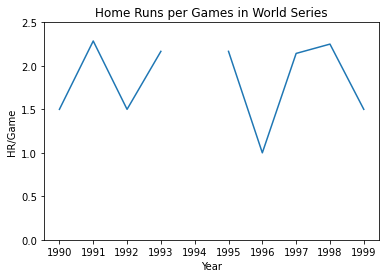

In [3]:
import matplotlib.pyplot as plt
plt.plot( df['Year'], df['HR/Game'] )
plt.title( 'Home Runs per Games in World Series' )
plt.xticks( df['Year'] )
plt.xlabel( 'Year' )
plt.ylabel( 'HR/Game' )
plt.ylim( 0, 2.5 )
plt.show()

Assume you were trying to show that this number was not going convincingly up or down throughout the 1990s (a made-up research question just as an example).  You're considering fitting a linear model to the data and showing that its slope is close to zero (perhaps even not statistically significantly different from zero).  Let's try.

In [4]:
import scipy.stats as stats
stats.linregress( df['Year'], df['HR/Game'] )

LinregressResult(slope=nan, intercept=nan, rvalue=nan, pvalue=nan, stderr=nan)

This has clearly failed, giving us all missing values in our linear model.  The reason, no doubt, is the missing value in our data.  (There was no World Series in 1994 due to a players' strike.)

So in this case, the missing values are clearly causing a problem with what we want to do with the data.  And since we can fit a linear model to the data that remains, it would be perfectly acceptable to drop the one row that has missing values and proceed with the nine rows that remain.  *This is a case in which removing the missing values makes sense.*

But we do not remove them from the original dataset; we simply don't include them in the data used to create the linear model.  The original dataset stays intact.

In [5]:
df_without_94 = df.dropna()
stats.linregress( df_without_94['Year'], df_without_94['HR/Game'] )

LinregressResult(slope=-0.001238738738738731, intercept=4.305389317889302, rvalue=-0.008554596649575391, pvalue=0.9825737815654227, stderr=0.05472871741068167)

Now we have an actual linear model.  (We're not going to analyze it here; that wasn't the point of this example.)

**Example 2:  Not removing missing values**

Let's say you're working for a small-but-growing automobile sales organization.  They've just opened their second location and they've realized that their growth has far outpaced their record-keeping.  They've got some spreadsheets about sales and commissions for their various employees, but it's not comprehensive because they haven't been organized about record-keeping in the past.  They've asked you to organize it into a database.

Let's say you realize the data isn't that huge, so you can probably fit it in one spreadsheet.  You begin by creating a private Google Sheet and sharing the link with all the sales managers, asking them to paste in all the historic data on which they have records, to create a shared dataset that's as comprehensive as possible.  You start with columns for month, employee, manager, number of sales, commission, and others.  When the task is done, you notice that many rows have missing values for the number of sales and commission columns.  The managers knew the employees were working there that month, but they'd lost the relevant historical data in the intervening years.

If you were to remove those rows from the dataset, it could make it seem as if the employee was not a part of the company or team at the time.  Thus even though those rows contain missing values, they are still communicating other important information.  In this case, you would decide not to remove the rows, even though they won't contribute much to any later analysis.

Any decision like this made when constructing a dataset should be documented in its data dictionary.

**Example 3: Actually adding missing values**

In the home mortgage dataset with which we're very familiar, some columns (such as interest rate) contain mostly numerical data, but occasionally the word Exempt appears instead of a number.  This makes it impossible to do any computations on such columns, such as `df['interest_rate'].mean()`, because the column is text, not numeric.

In this case, it can be valuable to replace the word Exempt with the actual missing value `np.nan` throughout the column, so that it can then be converted to type `float`.  In doing so, you should carefully document that all Exempt entries have become missing values, in order to facilitate analysis.  *This is a situation in which missing values are actually intentionally added!*

If you needed to track which rows had originally been Exempt, you could retain the original interest rate column for reference, creating a new one as you do the replacement.  Alternately, you could create a new column that records simply a single boolean value for "interest rate exempt" so that you can tell missing values from Exempt values.

Elsewhere in the same mortgage dataset, we find cases in which numbers like 999 were used for applicants' ages.  Clearly these are not correct values, and should be treated as a lack of data, rather than legitimate data.  Consider the alternatives for how to handle them:

| If we leave numbers like 999 in the data | If we replace them with missing values |
|------------------------------------------|----------------------------------------|
| Statistics about age, like mean, median, etc., will be very wrong | Statistics about age will be much more accurate |
| The number of missing values in the dataset will be very small | The number of missing values in the data will be much more accurate |

### When I need to remove missing values, how do I?

Removing missing values is called *data imputation,* which is simply the technical word for filling in values where there were none.  Imputation is an enormous area of statistics to which we cannot do justice in this chapter, but let's see why sometimes imputing values is essential.

In the baseball example above, we saw that some model-fitting procedures can't work with missing values, and we need to remove them from consideration.  Now let's assume we were fitting some (more complex) model to the property values in the mortgage dataset.  If we need to drop any row in which the property value is missing, how might that cause problems?

The question takes us right back to data provenance:  *Why* is the property value missing on the mortgage application?  Let's say we investigate and find that this is usually because the application was not completed by the potential borrower.  The question then arises: Are all borrowers equally likely to quit an application half way through?  If they are, then perhaps dropping such rows from the data is an acceptable move.

But the government publishes the data to help combat discrimination in lending.  What if we were to look at the proportion of incomplete applications and find that it's much higher for certain ethnic groups, especially in certain locations?  Perhaps they're not completing the application because they're facing discrimination in the process and don't have the energy or ability to fight it.  If that's the case, then dropping rows with missing property values will *significantly reduce the representation of those ethnic groups in our data.*  Our model will unintentionally favor the other ethnic groups.  Not only will it make bad predictions (so we've done our data work wrong) but it will help to further the discrimination the dataset was trying to prevent (so we've made an ethical mistake as well)!

So if we find that the missing values are not spread evenly across groups within our data, we can't in good conscience drop those rows.  Instead, we have to find some way to insert realistic or feasible values in place of the missing values.  Here are a few common ways to do so:
 * **Mean substitution** - Replace each missing property value with the mean property value across all rows.
 * **Model-based substitution** - Create a simple model that predicts property values based on other things, such as zip code, and use it to fill in each missing value.
 * **Random imputation** - Replace each missing property value with a randomly chosen property value from elsewhere in the dataset, or randomly chosen from other similar records (e.g., in the same state, or the same race, or the same income bracket, etc.).

Again, many statistical concerns arise when doing imputation that we cannot cover in this short chapter of notes.  This is merely an introduction to the fact that this practice is an important one.

## All the other munging things

As I said at the outset, it's not possible to cover everything you might need to do with data.  But here are a few essentials to keep in mind.

When using data, keep in mind the units on every number, in terms as precise as you possibly can.  You can insert these units as comments in your code.  There are famous stories of [tens of millions of dollars lost in spacecraft](https://en.wikipedia.org/wiki/Mars_Climate_Orbiter#Cause_of_failure) when units were not checked correctly in computer code, so these tiny details are not unimportant!

In *The Data Science Design Manual* quoted earlier, the author suggests several types of unit discrepencies to pay attention to.
 * differing standards of measurement, such as pounds vs. kilograms, or USD vs. GBP
 * the time value of money, such as USD in January 2017 vs. USD in February 2017
 * fluctuations in value, such as the price of gold at noon today vs. at 1pm today
 * discrepencies in time zones, such as the price of gold at noon today in London vs. noon today in New York
 * discrepencies in the units themselves, such as "shares of stock" before and after a stock split

Another common units error to be aware of is the difference between percentages and proportions.  For instance, 15% is equal to the proportion 0.15.  When reporting such a value to a human reader, such as in a table of results, the percent is typically the more user-friendly choice.  When using such a value in a computation, such as multiplying to apply a percentage or proportion to a total quantity, the only correct choice is the proportion.  That is, 15% of 200 people is not $15\times200=3000$, but $0.15\times200=30$.

Comments in code to track units can help with discrepencies like these.  See the code below that takes care with units as we adjust movie revenues for inflation in the following dataset.

In [6]:
df_films = pd.DataFrame( {
    'Title' : [ 'Avengers: Endgame', 'The Lion King', 'The Hunger Games', 'Finding Dory' ],
    'Year' : [ 2019, 2019, 2012, 2016 ],
    'Opening Weekend (M$)' : [ 357.115, 191.771, 152.536, 135.060 ]
} )
df_films

,Title,Year,Opening Weekend (M$)
0,Avengers: Endgame,2019,357.115
1,The Lion King,2019,191.771
2,The Hunger Games,2012,152.536
3,Finding Dory,2016,135.060


In [7]:
avg_annual_inflation = 3                                # An approximate percentage
inflation_factor = 1 + avg_annual_inflation/100         # Useful as an annual multiplier
df_films['Years since film'] = 2020 - df_films['Year']  # Number of years elapsed
df_films['Inflation factor'] = inflation_factor ** df_films['Years since film']
                                                        # Multiplier to apply inflation
df_films['Opening Weekend (M$2020)'] = df_films['Opening Weekend (M$)'] \
    * df_films['Inflation factor']                      # Convert all to $ millions in 2020
df_films

,Title,Year,Opening Weekend (M$),Years since film,Inflation factor,Opening Weekend (M$2020)
0,Avengers: Endgame,2019,357.115,1,1.030000,367.828450
1,The Lion King,2019,191.771,1,1.030000,197.524130
2,The Hunger Games,2012,152.536,8,1.266770,193.228041
3,Finding Dory,2016,135.060,4,1.125509,152.011220


Before we finish discussing ETL, we should talk about file formats, which are a crucial part of the whole process.

## Reading data files

As you know from [the DataCamp assignment that corresponds to this chapter](big-cheat-sheet.html#before-day-8), there are many ways to read data into pandas.  Since you've learned some of the technical details from DataCamp, let's look at the relative pros and cons of each file format here, and add a few pieces of advice that didn't appear in the DataCamp lessons.  We start with the easiest file formats and work our way up.

### Easy formats to read: CSV and TSV

We've been using `pd.read_csv()` for ages, so there is no surprise here, and you've had to deal with its `encoding` parameter in the past as well.  It has tons of optional parameters, but the one introduced in the latest DataCamp lessons was `sep`, useful for reading TSV (tab-separated values) files, by choosing `sep="\t"`.

One piece of advice I'll add to what DataCamp taught:  If you find the URL of a CSV file on the web, you can include that URL as the input parameter to `pd.read_csv()`, and it will download and read the file for you in one shot, without your having to manually download the file.
 * Pro: It automatically gets the latest version of the file every time you run your code.
 * Con: It accesses the Internet (which can sometimes be slow) every time you run your code.
 * Con: If the file is removed from the web, your code no longer functions.

In [8]:
# Providing a URL directly to pd.read_csv():
pd.read_csv( 'https://www1.ncdc.noaa.gov/pub/data/cdo/samples/PRECIP_HLY_sample_csv.csv' )

,STATION,STATION_NAME,ELEVATION,LATITUDE,LONGITUDE,DATE,HPCP,Measurement Flag,Quality Flag
0,COOP:310301,ASHEVILLE NC US,682.1,35.5954,-82.5568,20100101 00:00,99999,],
1,COOP:310301,ASHEVILLE NC US,682.1,35.5954,-82.5568,20100101 01:00,0,g,
2,COOP:310301,ASHEVILLE NC US,682.1,35.5954,-82.5568,20100102 06:00,1,,


### Pretty easy format to read: XLSX

The `pd.read_excel()` function is nearly as easy to use as `pd.read_csv()`, with a few exceptions documented below.  You can give this function a URL also, if there's a publicly accessible Excel file on the web you want to download.  The same pros and cons apply when providing a URL to `pd.read_excel()` as they do for `pd.read_csv()`, as discussed above.

 1. If you're running Python on a cloud service, you'll need the `openpyxl` module to be installed to add Excel support to pandas.  (You can tell if it's not when a `pd.read_excel()` call fails with an error about the missing module, or perhaps about the missing `xlrd` module, which is related.)  If you're on your local computer with an Anaconda installation, you may already have this module.  Otherwise, you need to run `pip install openpyxl` to add it.
 2. You need to remember that this function returns a Python list of DataFrames, unless you choose one specific sheet, with `sheet_name='Name'` or choose one by index, with `sheet_name=0`, for example.
 3. Excel spreadsheets may not have the data in the top left, so parameters like `usecols` and `skiprows` are often needed.  See [the official documentation](https://pandas.pydata.org/docs/reference/api/pandas.read_excel.html) for details on those parameters.

### Easy format to read with occasional problems: HTML

Pandas can often automatically extract tables from web pages.  Simply call `pd.read_html()` and give it the URL of the page containing the table or tables.  It has the same output type as `pd.read_excel()` does: a Python list of pandas DataFrames.  See the pros and cons listed under `pd.read_csv()` for providing live web URLs when reading data.

Furthermore, depending on the quality of the web site, this function may or may not do its job.  If the HTML page is not structured particularly cleanly, I've had `pd.read_html()` fail to find one or more of the tables.  I've had to instead write code that downloads the HTML code, splits it wherever a `<table...>` tag begins, and extract the tables from those pieces with `pd.read_html()`.  This is annoying, but occasionally necessary.

Note that if you don't need to get live data from the web, but are content with downloading the data once at the start of your project, there are many ways to extract tables from web pages.  You can often select the table and copy-paste into Excel, although that sometimes brings along undesired formatting that can cause problems.  There are Google Chrome extensions that specialize in extracting tables from web pages to make them easier to paste cleanly into Excel.

### Not an easy format to read: JSON

Although this format is not easy, it is powerful, and this is why it's very prevalent on the web.  It can represent a huge variety of different types of data, not just tabular data.  It is flexible enough to represent tabular data in a variety of ways, but also hierarchical data of any kind.  Due to its complexity, we will not fully review this here; refer to [the appropriate section of our course's coding cheat sheet](big-cheat-sheet.html#chapter-4-importing-json-data-and-working-with-apis) for some information, or [the corresponding DataCamp course](https://learn.datacamp.com/courses/streamlined-data-ingestion-with-pandas).

### Not an easy source to read: SQL

Rather than dive into the enormous topic of SQL databases here, I will suggest two ways that you can learn more:
 1. Your next (and final) DataCamp assignment, for next week, will do some introductory coverage of this content.
 2. Bentley has an entire course on SQL databases, CS350, which I recommend.

Now let's consider which file format to use when you need to create a file rather than read one.

## Writing data files

As with all types of communication, it's essential to consider your audience when choosing a file type.  Who will use your file?

### For a nontechnical audience, create an Excel file.

If sharing your data with non-technical people, they will want to simply double-click the file and see its contents.  The easiest way to ensure this happens is to create an Excel file.  (To make it even easier, you can upload the file to SharePoint or Google Sheets and send only the link.  This is especially valuable if you suspect the recipient doesn't have Excel installed or might be viewing your email on a mobile device.)

Just as when reading Excel files, you must have the `openpyxl` module installed; [see above for details](#pretty-easy-format-to-read-xlsx).  If you want to create an Excel file with just one sheet in it, you can make a single call to `df.to_excel()`.

```python
df_films.to_excel( 'Opening Weekends.xlsx' )
```

If you want to put several DataFrames into one Excel file, as different sheets in the workbook, then you need to get a little more fancy.  The indentation in the following code is essential (as always with Python).

```python
with pd.ExcelWriter( 'Two Things.xlsx' ) as writer:        # Open the file.
    df.to_excel( writer, sheet_name='World Series Data' )  # Write one sheet.
    df_films.to_excel( writer, sheet_name='Film Data' )    # Write the other.
```

Python's `with` statement lets you create a resource (in this case a new, open file) and Python will automatically close it up for you when you're done using it.  At the end of the two indented lines, Python will close the file, so that other applications can open it.

For more details, see [the documentation for `df.to_excel()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_excel.html).

### For a technical audience, usually use a CSV file.

If sharing data with other data workers, who are likely to use Python, R, or some similarly nerdy tool, you probably want to create a CSV file.  The reason is simple: You know that this is one of the easiest file types to import in your code, so make life easy for your coworkers, too.  Just call `pd.to_csv( 'my-filename.csv' )` to save your DataFrame.  Although you can use the `sep="\t"` parameter to create a TSV file, this is rarely what your coworkers want, so it's generally to be avoided.

But note that you can lose a lot of important information this way!  You may be familiar with how Excel complains if you try to save an Excel workbook in CSV format, letting you know that you're losing information, such as formatting and formulas.  Any information in your DataFrame other than the text contents of the cells will be lost when saving as CSV.  For instance, if you've converted a column to a categorial variable, that won't be obvious when the data is saved to CSV, and it will be re-imported as plain text.

For that reason, we have the following option.

### For archiving your own work, use a Pickle file.

Python has always had a way to store any Python object in a file, perfectly intact for later loading, using the Pickle format.  The standard extension for this is `.pkl`.  (That's P-K-L, not P-K-one, because it's short for PicKLe.)  The name comes, of course, from the fact that pickling vegetables stores them on the shelf long-term, and yet when you eventually open them later, they're fine.  Similarly, you can store Python objects in a file long-term, open them later, and they're fine.

Because Python guarantees that any object you pickle to a file will come back from that file in exactly the same form, you can pickle entire DataFrames and know that every little detail will be preserved, even things that won't get saved correctly to CSV or Excel files, like categorical data types.

This is a great way to obey the advice [at the end of the Chapter 11 notes](chapter-11-processing-rows.html#when-the-bottleneck-is-the-dataset).  If you load a big dataset and do a bunch of data cleaning work, and your code is a little slow to run, just save your work to a file right then.

```python
df.to_pickle( 'cleaned-dataset.pkl' )
```

Then start a new Python script or Jupyter notebook and load the DataFrame you just saved.

```python
df = pd.read_pickle( 'cleaned-dataset.pkl' )
```

Now do all your analysis work in that second script or notebook, and whenever you have to re-run your analysis from the beginning, you won't have to wait for all the data cleaning code to get run again.

We won't discuss in these notes the creation of HTML or JSON files from Python.  Although there is occasional value in it, it's much less commonly useful than reading those formats, which we covered above.  We also won't discuss the creation of SQL databases, but here are three ways you can learn more about that.
 1. SQL queries can be used to create or modify tables, and we'll see a bit about running SQL queries through Python in the upcoming DataCamp homework.
 2. Those interested in learning SQL deeply can take Bentley's CS350 course.
 3. Consider forming a team for one of the Learning On Your Own activities shown below.

```{admonition} Learning on Your Own - SQL in Jupyter
---
class: alert alert-danger
---
Look up the `ipython-sql` extension to Jupyter and research the following essential parts, then report on them in some sensible medium for your classmates.
 1. How to install it and load it.
 2. How to connect to a database.
 3. How to use both `%sql` and `%%sql` commands.
 4. How to store the results of database queries in pandas DataFrames.
```

```{admonition} Learning on Your Own - SQLite in Python
---
class: alert alert-danger
---
Python actually comes with a built-in SQLite database module, which you can use by doing `import sqlite3 as sl`, without even any installation step.  Check out [this blog post](https://towardsdatascience.com/do-you-know-python-has-a-built-in-database-d553989c87bd) for more information, and report to the class on its key features.  Ensure that you include at least one complete example of creating a database on disk and then reading values out of it again later with some queries.
```
